Index(['file', 'image_height', 'image_width', 'class_name', 'cx', 'cy',
       'bbox_w', 'bbox_h'],
      dtype='object')


<AxesSubplot:xlabel='bbox_w_new_log', ylabel='bbox_h_new_log'>

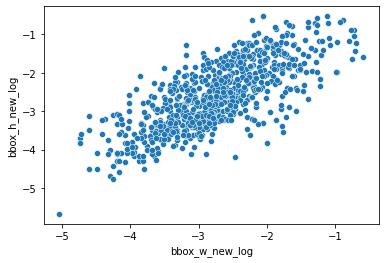

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv("calculations.csv")

print(df.columns)

df['cx_new'] = df['cx'] / df['image_width']
df['cy_new'] = df['cy'] / df['image_height']
df['bbox_w_new'] = df['bbox_w'] / df['image_width']
df['bbox_h_new'] = df['bbox_h'] / df['image_height']
df['bbox_w_new_log'] = np.log(df['bbox_w_new'])
df['bbox_h_new_log'] = np.log(df['bbox_h_new'])


# df.plot(kind='scatter', x='bbox_w_new_log', y='bbox_h_new_log')
sns.scatterplot(x='bbox_w_new_log', y='bbox_h_new_log', data=df)

In [2]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [10]:
len(df['bbox_w_new_log']), len(df['bbox_h_new_log'])

(781, 781)

In [12]:
data = pd.DataFrame(list(zip(df['bbox_w_new_log'], df['bbox_h_new_log'])), columns=['New_W_log', 'New_H_log'])

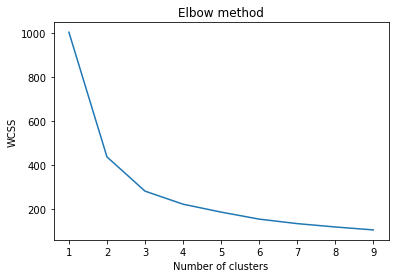

In [17]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=100)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()


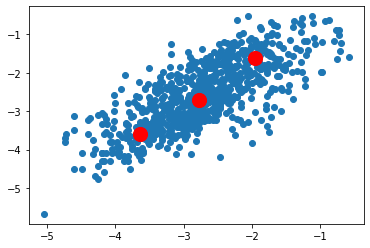

In [19]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=100)
pred_y = kmeans.fit_predict(data)
plt.scatter(data['New_W_log'], data['New_H_log'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red')
plt.show()